<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EC%A7%84%ED%95%B4Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **고장코드 有 변환 후**

### 데이터 불러오기

In [ ]:
import os
from scipy import io
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import re # 텍스트 검색(정규표현)
import struct
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
path_dir = '/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/27.진해_6033_200115_P1F0166,0066'
file_list = os.listdir(path_dir)

In [ ]:
for file in file_list:
  print(file)

진해_6033_20200114061311.mat
진해_6033_20200114065945.mat
진해_6033_20200114092858.mat
진해_6033_20200114115522.mat
진해_6033_20200114142250.mat
진해_6033_20200114164902.mat
진해_6033_20200114191610.mat
진해_6033_20200114211913.mat
진해_6033_20200115044101.mat
분할


In [ ]:
matfile14=[]
dist = path_dir+'/'+file_list[7] # file_list 1~6까진 분할파일에서 얻어야 함 (file size때문)
matfile14.append(io.loadmat(dist)) # 14일 

In [ ]:
feature_name = []
for file in matfile14:
  feature_name.append(list(file.keys()))
for i in feature_name:
  print(len(i))

1142


In [ ]:
test = pd.DataFrame(matfile14)

In [ ]:
col_len=[]
for i in range(len(test.T)):
  col_len.append(len(test.iloc[0,i]))

In [ ]:
np.argmax(col_len) # 최대 시간 길이를 가진 칼럼의 위치

47

In [ ]:
test.iloc[:,np.argmax(col_len)].iloc[0]

array([[240.1402 ,   0.     ],
       [240.1497 ,   0.     ],
       [240.1597 ,   0.     ],
       ...,
       [301.4632 ,   0.     ],
       [301.4732 ,   0.     ],
       [301.48315,   0.     ]])

In [ ]:
test.iloc[0,].iloc[0]

array([[2.40131550e+02, 2.01211479e-01],
       [2.40141650e+02, 2.01211479e-01],
       [2.40151550e+02, 2.01211479e-01],
       ...,
       [3.01458350e+02, 8.98832970e-02],
       [3.01468350e+02, 8.98832970e-02],
       [3.01478350e+02, 8.98832970e-02]])

# 데이터 통합

### Excel 채널 길이 확인

In [ ]:
excel_path = '/content/gdrive/MyDrive/학부연구생/겹치는채널.xlsx'
useful_excel1 = pd.read_excel(excel_path,sheet_name=0)
useful_excel2 = pd.read_excel(excel_path,sheet_name=1)
useful_excel3 = pd.read_excel(excel_path,sheet_name=2)
useful_excel4 = pd.read_excel(excel_path,sheet_name=3)
useful_excel5 = pd.read_excel(excel_path,sheet_name=4)
useful_excel6 = pd.read_excel(excel_path,sheet_name=5)

In [ ]:
sig1 = useful_excel1['SignalName'][:-1]
useful_excel1['SignalName'][:-1] # 맨 뒤 제외 , 휠모터 고장 연관 채널

0             BM1__AxuInverter__Inv_Battery_V
1           BM1__AxuInverter__INV_Fault_Check
2              BM1__AxuInverter__Inv_IptVol_V
3              BM1__AxuInverter__INV_Power_kW
4         BM1__AxuInverter__Mot_ActRotSpd_rpm
                        ...                  
122    CCAN__VCU_EFD__CR_VCU_EVCoolantAuxTemp
123    CCAN__VCU_EFD__CR_VCU_EVCoolantMotTemp
124    CCAN__VCU_EFD__CR_VCU_EVCoolantRadTemp
125             CCAN__VCU_M2__CR_VCU_ActDmdTq
126          CCAN__VCU_M2__CR_VCU_DriverDmdTq
Name: SignalName, Length: 127, dtype: object

In [ ]:
sig2 = useful_excel2['SignalName']
print(sig2.head(),'\n AuxInv 길이:',len(sig2))  # AuxInv

0        BM1__AxuInverter__Inv_Battery_V
1      BM1__AxuInverter__INV_Fault_Check
2         BM1__AxuInverter__Inv_IptVol_V
3         BM1__AxuInverter__INV_Power_kW
4    BM1__AxuInverter__Mot_ActRotSpd_rpm
Name: SignalName, dtype: object 
 AuxInv 길이: 25


In [ ]:
sig3 = useful_excel3['SignalName']
print(sig3.head(),'\n BMS 길이:',len(sig3))  # BMS

0            BM1__BMS10__CR_Bms_BulkSOC
1       BM1__BMS10__CR_Bms_EvEnergyCapa
2    BM1__BMS10__CR_Bms_EVTargetCurrent
3       BM1__BMS10__CR_Bms_EVTargetVolt
4            BM1__BMS10__CR_Bms_FullSOC
Name: SignalName, dtype: object 
 BMS 길이: 339


In [ ]:
sig4 = useful_excel4['SignalName']
print(sig4.head(),'\n EBS 길이:',len(sig4))  # EBS

0       CCAN__CVW__GrossCombinationVehicleWeight
1                CCAN__CVW__PoweredVehicleWeight
2    CCAN__DM1_EBS__AmberWarningLampStatus_EBS_C
3                      CCAN__DM1_EBS__DTC1_EBS_C
4                      CCAN__DM1_EBS__DTC2_EBS_C
Name: SignalName, dtype: object 
 EBS 길이: 143


In [ ]:
sig5 = useful_excel5['SignalName']
print(sig5.head(),'\n MCU 길이:',len(sig5))  # MCU

0    BM1__DM1_MCU_L__AmberWarningLampStatus_MCU_L_B
1                      BM1__DM1_MCU_L__DTC1_MCU_L_B
2                      BM1__DM1_MCU_L__DTC2_MCU_L_B
3                      BM1__DM1_MCU_L__DTC3_MCU_L_B
4                      BM1__DM1_MCU_L__DTC4_MCU_L_B
Name: SignalName, dtype: object 
 MCU 길이: 66


In [ ]:
sig6 = useful_excel6['SignalName']
print(sig6.head(),'\n VCU 길이:',len(sig6))  # VCU

0    BM1__DM1_VCU__AmberWarningLampStatus_VCU_B
1                      BM1__DM1_VCU__DTC1_VCU_B
2                      BM1__DM1_VCU__DTC2_VCU_B
3                      BM1__DM1_VCU__DTC3_VCU_B
4                      BM1__DM1_VCU__DTC4_VCU_B
Name: SignalName, dtype: object 
 VCU 길이: 157


In [ ]:
print(len(sig1)+len(sig2)+len(sig3)+len(sig4)+len(sig5)+len(sig6))
print(len(set(sig1)|set(sig2)|set(sig3)|set(sig4)|set(sig5)|set(sig6)))
set(sig1)&set(sig2)&set(sig3)&set(sig4)&set(sig5)&set(sig6)

857
730


set()

In [ ]:
# 휠모터 고장 연관 채널(sig1) + 다른 sheet 변수명(sig2~sig6) 교집합
print('1:',set(sig1)&set(sig2)) 
print('2:',set(sig1)&set(sig3))
print('3:',set(sig1)&set(sig4))
print('4:',set(sig1)&set(sig5))
print('5:',set(sig1)&set(sig6))

1: {'BM1__AxuInverter__Mot_CtrMod', 'BM1__AxuInverter__Mot_APU_Sensor', 'BM1__AxuInverter__Mot_PRE_Sensor', 'BM1__AxuInverter__Mot_ActRotSpd_rpm', 'BM1__AxuInverter__MotInv_Mode_Status', 'BM1__AxuInverter__Mot_APU_Stats', 'BM1__AxuInverter__Mot_TKO_Sensor', 'BM1__AxuInverter__INV_Fault_Check', 'BM1__AxuInverter__Inv_Battery_V', 'BM1__AxuInverter__MotInvRdy', 'BM1__AxuInverter__INV_Power_kW', 'BM1__AxuInverter__MotInv_Temp_C', 'BM1__AxuInverter__Inv_IptVol_V'}
2: {'BM1__BMS10__CR_Bms_FullSOC', 'BM1__BMS10__CR_Bms_BulkSOC', 'BM1__BMS11__CR_Bms_BatTotV_V', 'BM1__BMS10__CR_Bms_EVTargetCurrent', 'BM1__BMS10__CR_Bms_EvEnergyCapa', 'BM1__BMS10__CR_Bms_EVTargetVolt'}
3: {'CCAN__EBC1__EBSBrakeSwitch', 'CCAN__EBC1__EngRetarderSelection', 'CCAN__HRW__RearAxleLeftWheelSpeed', 'CCAN__HRW__RearAxleRightWheelSpeed', 'CCAN__EBC1__BrakePedalPos'}
4: {'BM1__MCU_L2__WarningFlagofMCU', 'BM1__MCU_L1__GeneratingTorqueUpperLimit', 'BM1__MCU_L2__InverterControllerReady', 'BM1__DM1_MCU_L__MalfunctionIndicatorL

In [ ]:
print('1:',len(set(sig1)&set(sig2)))
print('2:',len(set(sig1)&set(sig3)))
print('3:',len(set(sig1)&set(sig4)))
print('4:',len(set(sig1)&set(sig5)))
print('5:',len(set(sig1)&set(sig6)))

1: 13
2: 6
3: 5
4: 66
5: 37


In [ ]:
13+6+5+66+37 
# 휠모터고장연관채널 sheet는 각 sheet별로 고장에 제일 연관되어 보이는 것들만 뽑아 놓은 것

127

### Excel과 겹치는 채널 확인

In [ ]:
final_set = set(sig1)|set(sig2)|set(sig3)|set(sig4)|set(sig5)|set(sig6)
final_name = list(final_set)
final_name[:5] # 선정된 채널 이름들 중 5개 출력

['BM1__BMS_S1_3__CR_Bms_CoolStatus',
 'BM1__BMS9__CF_Bms_RlyWeldDetectionReq',
 'BM1__VCU_MCU_R1__CF_VCU_Rdy_MCU_R',
 'BM1__DM1_MCU_R__RedStopLampState_MCU_R_B',
 'BM1__BMS_M1_2__Monitor2']

* 15일 mat file 탐색

In [ ]:
set(test.columns)&final_set

In [ ]:
test['CCAN__XBR1__CR_VCU_XBRUrgency'].iloc[0][0][0]

240.1399

In [ ]:
test[test.columns[0]][0][0]

array([2.40131550e+02, 2.01211479e-01])

In [ ]:
test[test.columns[0]][0]

array([[2.40131550e+02, 2.01211479e-01],
       [2.40141650e+02, 2.01211479e-01],
       [2.40151550e+02, 2.01211479e-01],
       ...,
       [3.01458350e+02, 8.98832970e-02],
       [3.01468350e+02, 8.98832970e-02],
       [3.01478350e+02, 8.98832970e-02]])

In [ ]:
test.iloc[:,np.argmin(col_len)][0]

array([], shape=(0, 2), dtype=float64)

In [ ]:
test.iloc[:,np.argmax(col_len)][0]

array([[240.1402 ,   0.     ],
       [240.1497 ,   0.     ],
       [240.1597 ,   0.     ],
       ...,
       [301.4632 ,   0.     ],
       [301.4732 ,   0.     ],
       [301.48315,   0.     ]])

In [ ]:
test['CCAN__VDC2_EBS__SteerWheelAngleSensorType'].iloc[0]

array([[240.13155,   3.     ],
       [240.14165,   3.     ],
       [240.15155,   3.     ],
       ...,
       [301.45835,   3.     ],
       [301.46835,   3.     ],
       [301.47835,   3.     ]])

* 14일 mat file 탐색

In [ ]:
def main_search(n): # 전체(현대차 제공 columns엑셀 전체)와 비교
  path_dir = '/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/45.동남_1643_200928_P1F2086' # 동남 데이터 선택
  file_list = os.listdir(path_dir)
  matfile14=[]
  date = file_list[n]
  dist = path_dir+'/'+date # file_list 1~6까진 분할파일에서 얻어야 함 (file size때문)
  matfile14.append(io.loadmat(dist)) # 14일 21 19 13
  feature_name = [] 
  global main_test
  main_test = pd.DataFrame(matfile14)
  col_len=[]
  for i in range(len(main_test.T)):
    col_len.append(len(main_test.iloc[0,i]))
  global max_timelen_file
  max_timelen_file = []  
  max_timelen_file.append(main_test.iloc[:,np.argmax(col_len)].iloc[0]) # 해당 일자 data중 최대 길이 시간 길이인 채널 따로 저장
  selected_chan = set(main_test.columns)&final_set # 해당 파일중 선정된 채널에 해당하는 것 (column 교집합)
  print(dist) # 파일 주소 출력
  print(len(pd.DataFrame(matfile14).T)) # 데이터프레임 길이(채널 갯수)
  print(date)   # 날짜 표시
  print(max(col_len)) # 채널 중 최대 시간 길이
  print(len(selected_chan)) # 해당 채널의 총 길이
  global selected_df
  selected_df = main_test[selected_chan]

In [ ]:
def wheel_search(n): # 휠모터(시트1)과 비교
  path_dir = '/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/27.진해_6033_200115_P1F0166,0066' # 진해 데이터 선택
  file_list = os.listdir(path_dir)
  matfile14=[]
  date = file_list[n]
  dist = path_dir+'/'+date # file_list 1~6까진 분할파일에서 얻어야 함 (file size때문)
  matfile14.append(io.loadmat(dist)) # 14일 21 19 13
  global wheel_test
  wheel_test = pd.DataFrame(matfile14)
  col_len=[]
  for i in range(len(wheel_test.T)):
    col_len.append(len(wheel_test.iloc[0,i]))
  global max_timelen_file2
  max_timelen_file2 = []  
  max_timelen_file2.append(wheel_test.iloc[:,np.argmax(col_len)].iloc[0]) # 해당 일자 data중 최대 길이 시간 길이인 채널 따로 저장
  selected_chan = set(wheel_test.columns)&set(sig1) # 해당 파일중 wheel모터 고장 채널과의 교집합 
  print(dist) # 파일 주소 출력
  print("해당 파일 전체 채널 수 : ",len(pd.DataFrame(matfile14).T)) # 데이터프레임 길이(채널 갯수)
  print("파일명(날짜) : ",date)   # 날짜 표시
  print("데이터 포인트 최다 관측 수 : ",max(col_len)) # 채널 중 최대 시간 길이
  print("시트1과 겹치는 채널 수 : ", len(selected_chan)) # 해당 채널의 총 길이
  global wheel_df
  wheel_df = wheel_test[selected_chan].T
  return wheel_df

In [ ]:
# hi_1 = set(wheel_search(0).T.columns)
# hi_2 = set(wheel_search(11).T.columns)
# hi_1&hi_2

/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/27.진해_6033_200115_P1F0166,0066/분할/진해_6033_20200114191610_1.mat
631
진해_6033_20200114191610_1.mat
709706
43


In [ ]:
wheel_search(8)

/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/27.진해_6033_200115_P1F0166,0066/진해_6033_20200115044101.mat
해당 파일 전체 채널 수 :  609
파일명(날짜) :  진해_6033_20200115044101.mat
데이터 포인트 관측 수 :  1484
시트1과 겹치는 채널 수 :  32


,0
CCAN__ETC1__CR_VCU_ShiftInProcess,"[[240.4519, 0.0], [240.4619, 0.0], [240.4719, ..."
CCAN__EMRC1__CR_Vcu_Em1TorqMode,"[[240.45275, 14.0], [240.46365, 14.0], [240.47..."
CCAN__VCU_CLUINF1__CF_VCU_MotorOverTemp,"[[240.5451, 0.0], [240.6451, 0.0]]"
CCAN__ETC1__CR_VCU_InputShaftSpd,"[[240.4519, 0.0], [240.4619, 0.0], [240.4719, ..."
CCAN__VCU_CLUINF1__CF_VCU_MCUInverterFault,"[[240.5451, 0.0], [240.6451, 0.0]]"
CCAN__EMRC1__CR_Vcu_Em1ActMaxAvailRtdTq,"[[240.45275, 0.0], [240.46365, 0.0], [240.4727..."
BM1__BMS10__CR_Bms_EVTargetVolt,"[[241.20325, 0.0], [241.30325, 0.0], [241.4032..."
CCAN__VCU_M2__CR_VCU_DriverDmdTq,"[[240.45305, 0.0], [240.46395, 0.0], [240.4730..."
CCAN__EMRC1__CR_Vcu_Em1RtdPerTorq,"[[240.45275, 0.0], [240.46365, 0.0], [240.4727..."
BM1__BMS10__CR_Bms_FullSOC,"[[241.20325, 0.0], [241.30325, 0.0], [241.4032..."


## 겹치는 채널  EDA

> Idea : 시계열데이터인 만큼, 시간 변화에 따라 값에도 변화가 있어야 고장 예측에 있어서 유의미하지 않을까?

> unique판별을 하여서, 시간의 흐름에 따라 값에 변동이 있는 휠모터 columns값들을 뽑아보는게 좋지 않을지 생각.

In [ ]:
jinhae_0114_06_13_11 = wheel_search(0)

/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/27.진해_6033_200115_P1F0166,0066/진해_6033_20200114061311.mat
해당 파일 전체 채널 수 :  145
파일명(날짜) :  진해_6033_20200114061311.mat
데이터 포인트 최다 관측 수 :  1464
시트1과 겹치는 채널 수 :  0


In [ ]:
jinhae_0114_21_19_13 = wheel_search(7) # 시트1 채널 전체 발견됨.

/content/gdrive/MyDrive/DATA/고장코드 有_변환 후/27.진해_6033_200115_P1F0166,0066/진해_6033_20200114211913.mat
해당 파일 전체 채널 수 :  1142
파일명(날짜) :  진해_6033_20200114211913.mat
데이터 포인트 최다 관측 수 :  6135
시트1과 겹치는 채널 수 :  127


0
[array([[240.2057 , 102.     ],
       [240.30565, 102.     ],
       [240.40565, 102.     ],
       ...,
       [301.19245, 102.     ],
       [301.29245, 102.     ],
       [301.3924 , 102.     ]])]
1
[array([[240.1402 ,   0.     ],
       [240.1497 ,   0.     ],
       [240.1597 ,   0.     ],
       ...,
       [301.4632 ,   0.     ],
       [301.4732 ,   0.     ],
       [301.48315,   0.     ]])]
2
[array([[241.665  ,   0.     ],
       [242.66485,   0.     ],
       [243.66485,   0.     ],
       [244.66495,   0.     ],
       [245.66505,   0.     ],
       [246.6651 ,   0.     ],
       [247.665  ,   0.     ],
       [248.66495,   0.     ],
       [249.6649 ,   0.     ],
       [250.6648 ,   0.     ],
       [251.665  ,   0.     ],
       [254.44665,   0.     ],
       [255.44685,   0.     ],
       [256.44685,   0.     ],
       [257.4468 ,   0.     ],
       [258.4468 ,   0.     ],
       [259.44685,   0.     ],
       [260.4468 ,   0.     ],
       [261.44695,   0.     ],
  

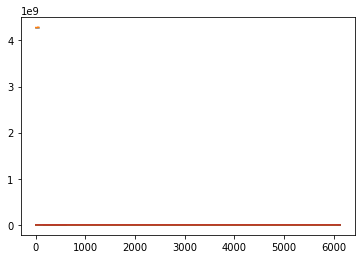

In [ ]:
for chan,value in enumerate(jinhae_0114_21_19_13.values):
  print(chan) # 채널별로
  print(value) # 찍히는 시간과 값

In [ ]:
def find_unique(df_values): # 시계열적 값의 변화(진동) 1번 이상 
  is_unique = 0
  useful_idx = []
  for i in range(len(df_values)):
    df = pd.DataFrame(df_values)
    unique_value = np.unique(df.iloc[i].values[0][:,1])
    is_unique = len(np.unique(df.iloc[i].values[0][:,1])) # 각 chan의 value값의 고유값 존재 여부를 check
    if is_unique > 1:
      useful_idx.append(i)
  return useful_idx

In [ ]:
jinhae_useful_idx = find_unique(jinhae_0114_21_19_13.values)
len(jinhae_useful_idx) # 63개의 값에 시계열적 변화가 있는 유용한 idx 발견

63

In [ ]:
jinhae_0114_21_19_13.values[jinhae_useful_idx[-1]] # 0과 1이 찍힌 예시

array([array([[240.91145,   0.     ],
       [240.9215 ,   0.     ],
       [240.93145,   0.     ],
       ...,
       [301.46115,   1.     ],
       [301.47135,   1.     ],
       [301.481  ,   1.     ]])], dtype=object)

In [ ]:
jinhae_0114_21_19_13.iloc[jinhae_useful_idx] #  해당 columns

,0
CCAN__VCU_EFD__CR_VCU_EVCoolantRadTemp,"[[240.48265, 49.0], [241.483, 49.0], [242.4830..."
BM1__MCU_L2__IG_Voltage,"[[240.91145, 28.0], [240.9215, 28.0], [240.931..."
CCAN__VCU_CLUINF1__CR_VCU_MotorPower_Per,"[[240.1849, 0.0], [240.2849, 0.0], [240.3849, ..."
BM1__MCU_L2__EstimatedMotorTorque,"[[240.91145, 0.0], [240.9215, 0.0], [240.93145..."
BM1__MCU_L1__InverterInputPower,"[[240.9112, 0.0], [240.9212, 0.0], [240.9312, ..."
...,...
BM1__MCU_L3__MCUWarningCode,"[[240.962, 0.0], [241.062, 0.0], [241.16205, 0..."
CCAN__ETC2__CR_VCU_TrasmCurRange,"[[240.1815, 82.0], [240.2815, 82.0], [240.3815..."
CCAN__EMRC1__CR_Vcu_Em1MotOutShaftSpd,"[[240.1425, 0.0], [240.1506, 0.0], [240.16145,..."
BM1__AxuInverter__Mot_ActRotSpd_rpm,"[[240.91855, 1245.0], [241.01935, 1245.0], [24..."


In [ ]:
def find_unique2(df_values): # 진동 3번 이상 = unique 밸류 적어도 4개 이상
  is_unique = 0
  useful_idx = []
  for i in range(len(df_values)):
    df = pd.DataFrame(df_values)
    unique_value = np.unique(df.iloc[i].values[0][:,1])
    is_unique = len(np.unique(df.iloc[i].values[0][:,1])) # 각 chan의 value값의 고유값 존재 여부를 check
    if is_unique > 3:
      useful_idx.append(i) 
  return useful_idx

In [ ]:
jinhae_useful_idx2 = find_unique2(jinhae_0114_21_19_13.values)
len(jinhae_useful_idx2) ,  jinhae_0114_21_19_13.index[jinhae_useful_idx2[0]] 

(24, 'BM1__MCU_L2__IG_Voltage')

In [ ]:
np.unique(jinhae_0114_21_19_13.iloc[jinhae_useful_idx2[0]].values[0][:,1])  # 전압값이 0,1,2...28까지 단기간내 다양하게 요동침

array([ 0.,  1.,  2.,  3.,  6., 12., 22., 26., 27., 28.])

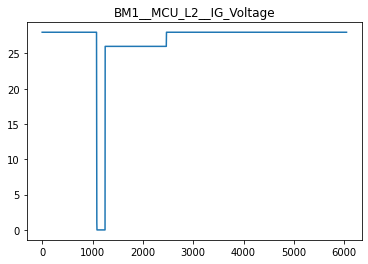

In [ ]:
plt.title("BM1__MCU_L2__IG_Voltage")
plt.plot(jinhae_0114_21_19_13.iloc[jinhae_useful_idx2[0]].values[0][:,1])

In [ ]:
name = jinhae_0114_21_19_13.index[jinhae_useful_idx2[1]] 
np.unique(jinhae_0114_21_19_13.iloc[jinhae_useful_idx2[1]].values[0][:,1])  # 모터 토크값이 심하게 변동이 있음.

array([-26.1484375 , -25.90625   , -25.66015625, -25.390625  ,
       -25.125     , -24.83203125, -24.51171875, -24.21875   ,
       -23.90234375, -23.5625    , -23.1953125 , -22.828125  ,
       -22.48828125, -22.12109375, -21.77734375, -21.4140625 ,
       -21.0703125 , -20.73046875, -20.36328125, -20.01953125,
       -19.6796875 , -19.3359375 , -18.99609375, -18.65234375,
       -18.3125    , -17.99609375, -17.67578125, -17.359375  ,
       -17.04296875, -16.75      , -16.45703125, -16.1640625 ,
       -15.89453125, -15.625     , -15.3828125 , -15.13671875,
       -14.94140625, -14.7734375 , -14.6015625 , -14.48046875,
       -14.3828125 , -14.33203125, -14.2578125 , -14.1875    ,
       -14.08984375, -12.52734375, -12.18359375, -11.84375   ,
       -11.5       , -11.16015625, -10.81640625, -10.4765625 ,
       -10.15625   ,  -9.81640625,  -9.5       ,  -9.1796875 ,
        -8.88671875,  -8.5703125 ,  -8.42578125,  -8.3984375 ,
        -8.375     ,  -8.3515625 ,  -8.328125  ,  -8.30

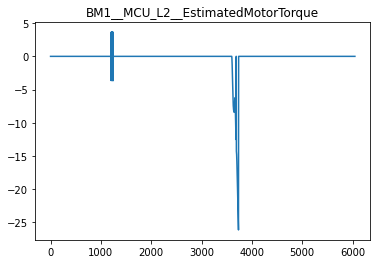

In [ ]:
plt.title(name)
plt.plot(jinhae_0114_21_19_13.loc[name].values[0][:,1])

0    [[240.91145, 0.0], [240.9215, 0.0], [240.93145...
Name: BM1__MCU_L2__EstimatedMotorTorque, dtype: object